# Análisis de la Aproximación Butterworth
## Filtro pasa bajas de orden N

**Definición**

La función de transferencia con la aproximación Butterworth $H(j\omega)$ para un filtro pasa bajas no normalizado se define como
$$\left|{\large H}^{\scriptsize(N)}_{\scriptsize PB}(j\omega)\right| \triangleq \dfrac{1}{\sqrt{1+\left(\dfrac{\omega}{\omega_c} \right)^{2N}}}$$

donde $N$ es el orden del filtro y $\omega_c$ la frecuencia de corte en $\dfrac{rad}{s}$

$$\left|{\large H}^{\scriptsize(N)}_{\scriptsize PBN}(j\omega)\right|^2 = \dfrac{1}{1 + \omega^{2N}}$$

La localización de los polos de dicha función se ubican en 
$$s_k=\omega_cexp\left( j\Theta_k \right)$$

$$\Theta_k = \dfrac{\pi}{2n}(2k+n-1)$$

In [2]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def plot_poles(hs):
    wc = np.abs(hs)[0]
    re = np.real(hs)
    im = np.imag(hs)
    #
    plt.figure(figsize=(8,8))
    #
    plt.plot(re, im, 'o', markersize=14)
    circle = plt.Circle((0,0), wc, color='r', fill=False, linewidth=3)
    plt.gca().add_patch(circle)
    #
    plt.plot([0], [0], 'ok', markersize=12)
    plt.axvline(0, color='black', linewidth=3)
    plt.axhline(0, color='black', linewidth=3)
    plt.grid(True)
    plt.show()

def print_complex(c):
    def split(x):
        xre, xim = np.real(x), np.imag(x)
        txt  = "{}".format(' -'[1*(xre<0)]) 
        txt += f"{abs(xre):6.4f}"
        txt += " {} ".format('+-'[1*(xim<0)]) 
        txt += f"{abs(xim):6.4f}j"
        return txt
    #
    clist = list(map(split, c))
    clist = "\n".join(clist)
    print(clist)
#
class respuesta_f:
    def __init__(self, w_max=1000):
        SR         = 5
        self.w_max = w_max
        self.w     = np.arange(1, SR*w_max)/SR
    #
    def set_Hs(self, Y, X):
        self.Hs = Y/X
    #
    @staticmethod
    def plot_mag(H, w, color='orange'):
        M_dB = 20*np.log10(np.abs(H))
        #
        plt.figure('Magnitud [dB]', figsize=(12, 6))
        plt.semilogx(w, M_dB, color, linewidth=3)
        plt.grid(True)
        #plt.show()
        
    @staticmethod
    def plot_phase(H, w, color='blue'):
        angle = np.angle(H, deg=True)
        #
        plt.figure('Fase [°]', figsize=(12, 7))
        plt.semilogx(w, angle, color, linewidth=3)
        plt.grid(True)
        #plt.show()

In [34]:
n = 3.
#k = np.arange(2*n)
k   = np.arange(1, 2*n + 1)
sec = 1j*np.pi/(2*n)
s   = np.exp(sec*(2*k + n - 1))
print_complex(s)

-0.5000 + 0.8660j
-1.0000 + 0.0000j
-0.5000 - 0.8660j
 0.5000 - 0.8660j
 1.0000 - 0.0000j
 0.5000 + 0.8660j


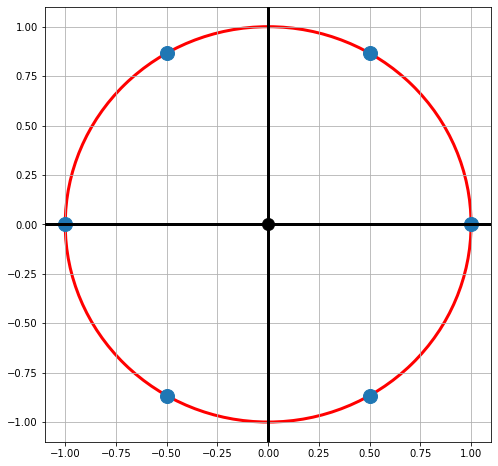

In [35]:
plot_poles(s)

In [5]:
def butter(n=2):
    #k = np.arange(2*n)
    k   = np.arange(1, 2*n + 1)
    sec = 1j*np.pi/(2*n)
    s   = np.exp(sec*(2*k + n - 1))
    return s

In [6]:
@widgets.interact(n=(1, 10, 1))
def butter_poles(n=2):
    s = butter(n)
    plot_poles(s)    
    print_complex(s)

interactive(children=(IntSlider(value=2, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

In [32]:
@widgets.interact(n=(1, 10, 1))
def butter_poles(n=2):
    s = butter(n)
    #
    mask   = np.real(s)<0
    s_estb = s[mask]
    plot_poles(s_estb)
    print_complex(s_estb)

interactive(children=(IntSlider(value=2, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

In [33]:
(np.arctan(0.9239/-0.3827))/np.pi

-0.37499762103427225

Los polos $\Theta_k$ en la función de transferencia $H(s)$: 
$$H(s) = {\Large\Pi}_{\small k=1}^{\small N}\left( \dfrac{1}{s - {\Large e}^{j\Theta_k}} \right)$$

Para $N$ par
$$H(s) = {\Large\Pi}_{\small k=1}^{\small N/2}\left( \dfrac{1}{s^2 - 2cos(\Theta_k)s + 1} \right)$$

Para $N$ impar
$$H(s) = {\Large\Pi}_{\small k=1}^{\small \lfloor N/2\rfloor}\left( \dfrac{1}{s^2 - 2cos(\Theta_k)s + 1} \right)\left( \dfrac{1}{s + 1} \right)$$

In [59]:
@widgets.interact(n=(1, 10, 1))
def butter_coef(n=2):
    k     = np.arange(1, n//2 + 1)
    theta = np.pi/(2*n)*(2*k + n - 1)
    print(theta, 2*np.cos(theta))
    if n%2!=0:
        print(1)

interactive(children=(IntSlider(value=2, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

In [4]:
@widgets.interact(n=(1, 12, 1))
def butter_coef(n=2):
    k     = np.arange(1, n//2 + 1)
    theta = np.pi/(2*n)*(2*k + n - 1)
    num  = (' '*8 + '1' + ' '*10)*len(theta)
    frac = ('-'*17 + '  ')*len(theta)
    den  = ""
    for th in theta:
        den += f"s^2 + {2*abs(np.cos(th)):6.4f}s + 1  "
    if n%2!=0:
        num  += ' '*2 + '1' + ' '*2
        frac += '-'*5
        den  += f"s + 1  "
    #
    print(num)
    print(frac)
    print(den)

interactive(children=(IntSlider(value=2, description='n', max=12, min=1), Output()), _dom_classes=('widget-int…

In [5]:
w_max  = 1E3
colors = ['green', 'blue', 'lime', 'violet', 'black', 'magenta']
@widgets.interact(n=(1, 12, 1), cascade=False)
def butter_coef(n=2, cascade=False):
    k     = np.arange(1, n//2 + 1)
    theta = np.pi/(2*n)*(2*k + n - 1)
    #
    H = [respuesta_f(w_max) for h in theta]
    #
    XT = 1
    for h, t, c in zip(H, theta, colors):
        s  = 1j*h.w
        Ys = 1
        Xs = s**2 - 2*np.cos(t)*s + 1
        h.set_Hs(Ys, Xs)
        respuesta_f.plot_mag(h.Hs, h.w, color=c)
        XT *= Xs
    #
    if n%2!=0:
        h1 = respuesta_f(w_max)
        s  = 1j*h1.w
        Ys = 1
        Xs = s + 1
        h1.set_Hs(Ys, Xs)
        respuesta_f.plot_mag(h1.Hs, h1.w)
        XT *= Xs
    #
    if cascade:
        ht = respuesta_f(w_max)
        s  = 1j*ht.w
        ht.set_Hs(1, XT)
        respuesta_f.plot_mag(ht.Hs, ht.w, color='red')

interactive(children=(IntSlider(value=2, description='n', max=12, min=1), Checkbox(value=False, description='c…

## Transformación en Frecuencias
### Pasa-bajas a basa-bajas

$${\large H}_{\scriptsize PBN}^{\scriptsize (1)}(s) = \dfrac{1}{s + 1}$$
$${\large H}_{\scriptsize PB}^{\scriptsize (1)}(s) = {\large H}(s)\Bigm\lvert_{s=\frac{s}{\omega_c}} = \dfrac{1}{\left(\dfrac{s}{\omega_c}\right) + 1} \quad\quad= \dfrac{\omega_c}{s + \omega_c}$$

$${\large H}_{\scriptsize PBN}^{\scriptsize (2)}(s) = \dfrac{1}{s^2 + 2\zeta s + 1}$$
$${\large H}_{\scriptsize PB}^{\scriptsize (2)}(s) = {\large H}(s)\Bigm\lvert_{s=\frac{s}{\omega_c}} = \dfrac{1}{\left(\dfrac{s}{\omega_c}\right)^2 + 2\zeta\left(\dfrac{s}{\omega_c}\right) + 1} \quad\quad= \dfrac{\omega_c^2}{s^2 + 2\zeta\omega_c s + \omega_c^2}$$

## Estimar el Orden del Filtro

In [6]:
@widgets.interact(fp=(1, 300), fr=(10, 800), Ap=(0.1, 4), Ar=(10, 150))
def butter_design(fp=20, fr=50, Ap=0.1, Ar=10):
    G = lambda A: 10**(0.1*A) - 1
    wp = 2*np.pi*fp
    wr = 2*np.pi*fr
    #
    N = np.log(G(Ap)/G(Ar)) / (2*np.log(wp/wr))
    #
    fcp = wp*(Ap)**(-1/(2*N))/(2*np.pi)
    fcr = wr*(Ar)**(-1/(2*N))/(2*np.pi)
    #
    if wr < wp:
        print("Error wr < wp")
    else:
        print(f"\
        N = {N:6.4f},  \
        N_impl = {int(np.ceil(N))},  \
        fc_p = {fcp:6.4f} Hz,  \
        fc_r = {fcr:6.4f} Hz")

interactive(children=(IntSlider(value=20, description='fp', max=300, min=1), IntSlider(value=50, description='…